# Installation nengo

In [1]:
%matplotlib inline
!pip install nengo
!pip install nengo_dl
#!pip install nengo_ocl
!pip install urllib3
!pip install nengo-extras

from urllib.request import urlretrieve

import nengo
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#import nengo_dl

     |████████████████████████████████| 523 kB 5.4 MB/s 
     |████████████████████████████████| 283 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for nengo-dl: filename=nengo_dl-3.4.2-py3-none-any.whl size=204641 sha256=e852a5bcf952a50c138ee96d6650c748739b1e55ca9e7ce45cc0bf943ae2580b
  Stored in directory: /root/.cache/pip/wheels/07/22/9b/abf4313c8943df36addfec2336d2d6559c9f7a85f7bf0c67b2
Successfully built nengo-dl
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0
     |████████████████████████████████| 78 kB 3.5 MB/s 


In [2]:
from __future__ import print_function

import os

import nengo
#import nengo_ocl
import numpy as np

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (Activation, Conv2D, Dense, Dropout, Flatten,AvgPool2D,MaxPooling2D,LeakyReLU,Input,Concatenate,Subtract)
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.python.keras.utils import np_utils

from tensorflow.keras.layers import BatchNormalization

#from nengo_extras.keras import (load_model_pair, save_model_pair, SequentialNetwork, SoftLIF)
from nengo_extras.gui import image_display_function

# **Load MNIST**

In [3]:
from __future__ import print_function

import os


import numpy as np

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (Activation, Conv2D,GlobalAveragePooling2D, Dense, Dropout, Flatten,AvgPool2D,MaxPooling2D,LeakyReLU,Input,Concatenate,Subtract)
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.python.keras.utils import np_utils

from tensorflow.keras.layers import BatchNormalization


# --- Parameters
np.random.seed(1)
filename = 'mnist_spiking_cnn'
run_in_theano = False
#use_ocl = True
presentation_time = 0.15
n_presentations = 100

# --- Load data
img_rows, img_cols = 28, 28
n_classes = 10

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = (mnist.load_data())
data_format = 'channels_last'


def preprocess(X):
    X = X.astype('float32') / 255
    if data_format == 'channels_first':
        X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    else:
        X = X.reshape(X.shape[0], img_rows, img_cols, 1)

    return X


X_train, X_test = preprocess(X_train), preprocess(X_test)

input_shape = X_train.shape[1:]
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

11501568/11490434 [==============================] - 0s 0us/step


# **# Hahn moments**


In [ ]:
from __future__ import division
from numpy import *
import math
import matplotlib.pylab as pt
import mpmath
from decimal import Decimal, localcontext

def KernelsHahn(x, n, alpha, beta, N):

    return mpmath.hyp3f2(-n, n + alpha + beta + 1, -x, alpha + 1, -N, 1,accurate_small=False)

def HahnPolynome(n, N, alpha, beta):
    with localcontext() as ctx:
        ctx.prec =10
        n=n+1
        gh=zeros(n)
        om=zeros(N)
        A=zeros((n,N))
        for i in range (0,n):

            gh[i]=Decimal(ghoHahn(i,alpha, beta, N))

        for j in range(0,N):
            om[j]=Decimal(omegaHahn(j, alpha, beta, N))


        for i in range(0,n):
            #print(i)
            for j in range(0,N):
                #print('omega',om[j],' gho:', gh[i])
                aa=Decimal(abs((om[j])/(gh[i])))
                #print(aa)
                A[i, j] = KernelsHahn(j, i, alpha, beta, N) * float(aa.sqrt())

        #pt.plot(transpose(A[i,:]), label='n='+str(i))



    #A=transpose(A)

        #pt.plot(transpose(A))

    #pt.legend()
        #pt.show()
    return A




def omegaHahn(x, alpha, beta, N):
    with localcontext() as ctx:
        ctx.prec = 100  # 100 digits precision
        a=Decimal(0)
        b=Decimal(0)
        c=Decimal(0)
        param1 = (alpha + 1)
        param2 = (x)
        param3 = (beta + 1)
        param4 = (N - x)
        a =Decimal(pochHamer(param1, param2) * pochHamer(param3, param4))
        b =Decimal(math.factorial(N - x) * math.factorial(x))

        c = Decimal(Decimal(a / b) / Decimal(1E+308))
        #print('omega:',c )
    #return c.ln()
    return c
    #print(a, '  ', b, '  ', c)



def pochHamer(a, k):

    if (k == 0):
        akk = 1
    elif k == 1:
        akk = a
    else:
        akk = a
    for i in range(1,k):
        akk = akk * (a + i)

    return akk

def ghoHahn(n, alpha, beta, N):
    with localcontext() as ctx:
        ctx.prec = 100  # 100 digits precision
        
        param1 = Decimal(n + alpha + beta + 1);
        param2 = (N + 1);
        param3 = Decimal(alpha + 1);
        param4 = Decimal(-N);
        param5=Decimal(pow((-1), n))
        #print(Decimal(math.factorial(n)))
        a = (Decimal(param5 * pochHamer(param1, param2) * pochHamer((beta + 1), n) * Decimal(math.factorial(n))))
        
        b = (Decimal(((2 * n) + alpha + beta + 1) * pochHamer(param3, n) * pochHamer(param4, n) *Decimal( math.factorial(N))))

        c = Decimal(Decimal(a / b) / Decimal(1E+308))
        #print('gho:', c)

    #return c.ln()
    return c



def ImageReconstructionHahn3DV2(Mt, ordre, a1, b1, a2, b2, a3, b3):
    M,N,L=shape(Mt)
    A=HahnPolynome(ordre, M, a1, b1)
    B = A
    ImageRec=zeros((M,M,M),uint8)
    for i in range(0,L):
        img2D=Mt[:,:, i]
        MMM = matmul(A , img2D)
        MMM = matmul(MMM, transpose(B));
        ImageRec[:,:, i] = matmul(matmul(transpose(A),MMM),B)
    return ImageRec

def ImageReconstructionHahn3D(Mt, ordre, a1, b1, a2, b2,a3, b3):
    MM, NN, LL = shape(Mt)
    print(MM, NN, LL)
    K111=HahnPolynome(ordre,LL , a1, b1)
    K222=K111
    K333=K111
    #K222 = HahnPolynome(ordre, n, a2, b2)
    #K333=HahnPolynome(ordre, n, a3, b3)
    ordre=ordre+1
    MMM=zeros([ordre,ordre,LL])

    for i in range(0,LL):
        MMM[:,:, i]=matmul(K111, matmul(Mt[:,:, i],transpose(K222)))

    MMMM = zeros((LL,ordre, ordre))
    for i in range(0,ordre):
        for j in range(0,ordre):
            for k in range(0,LL):
                MMMM[k, j , i] = MMM[i , j , k]

    momentD = zeros((ordre, ordre, ordre))
    for z in range(0,ordre):
        momentD[:,:, z]=(matmul(K333,MMMM[:,:, z ]))

    MMRec1 = zeros((LL, LL, ordre))
    for i in range(0,ordre):
        MMRec1[:,:, i ]=(matmul(transpose(K111),matmul(momentD[:,:,i],K222)))

    MMRec11 = zeros((ordre,LL, LL))
    for i in range(0,LL):
        for j in range(0,LL):
            for k in range(0,ordre):
                MMRec11[k, j, i] = MMRec1[i, j, k ]

    MMRec4 = zeros((LL, LL, LL))
    for zz in range(0,LL):
        MMRec4[:,:, zz]=(matmul(transpose(K333),MMRec11[:,:,zz]))

    return (MMRec4)



def  aCoef(n, a, b, N):

    if n == 0:

        a1 = 1
        a2 = 0
        a3 = 0
        a4 = 0

    elif n == 1:
        a1 = 1
        a2 = -(n * (n + a + b + 1)) / (N * (a + 1));
        a3 = 0
        a4 = 0
    else:# n == 2:
        a1 = 1
        b = -(n * (n + a + b + 1)) / (N * (a + 1));
        c = (pow(n,2) - n) * (pow(n + a + b + 1, 2) + (n + a + b + 1)) / (2 * (pow((a + 1), 2) + (a + 1)) * (pow(N , 2) - N))
        a2 = b - c
        a3 = c
        a4 = 0
    return a1,a2,a3,a4


def nuFunction(fw, i, j, mg, x_bar, y_bar, teta):
    M, N= shape(fw)
    ll = 0
    teta=pi*teta

    matR = array([[math.cos(teta).real, math.sin(teta).real], [-math.sin(teta).real, math.cos(teta).real]])
    #print(shape(matR))
    #print(matR)
    for x in range (0,M):
        for y in range(0,N):

            a1 = pow(((((x - x_bar) * matR[0, 0] + (y - y_bar) * matR[0, 1]) * sqrt(1 / mg)) + (M / 2)), i)
            b1 = pow(((((x - x_bar) * matR[1, 0] + (y - y_bar) * matR[1, 1]) * sqrt(1 / mg)) + (N / 2)) ,j)
            #print("a1",a1)
            #print("b1", b1)
            invar = a1 * b1
            ll = ll + (invar) * fw[x, y]
    nu=pow(ll * mg, -1)

    return  nu

def Qw2D(n, m, fw, mg, x_bar, y_bar, teta, alpha1, beta1, alpha2, beta2):
    moment = 0;
    M, N = shape(fw);
    a = aCoef(n, alpha1, beta1, M);
    b = aCoef(m, alpha2, beta2, N)
    ghon = ghoHahn(n, alpha1, beta1, N);
    ghom = ghoHahn(m, alpha2, beta2, N);
    # print(moment)

    dd = ghon * ghom
    mmm = Decimal(sqrt(dd))

    for i in range(0,n+1):
        for j in range(0,m+1):

            mom=a[i]*b[j] * nuFunction(fw, i, j, mg, x_bar, y_bar,teta)
            moment = moment + Decimal(Decimal(mom) * Decimal(mmm))
    #moment = Decimal(Decimal(moment) * Decimal(mmm))
    #print(moment)
    return float(moment)


def momentGeometrique2D(fw, i, j):
    M,N= shape(fw)
    mt = 0;
    for x in range(0,M):
        for y in range(0,N):
            mt = mt + pow(x,i) * pow(y,j) * fw[x, y];
    return mt


def momentGeometriqueInvariant2D(fw, i, j, x_bar, y_bar):
    M, N = shape(fw)
    moment = 0;
    for x in range(0,M):
        for y in range(0,N):
            moment = moment + pow((x - x_bar) , i) * pow((y - y_bar),j) * fw[x, y]


    return moment

def getTetaTeague(a,b,c):


    if(a==0 and b-c==0):
         teta=0;
    elif(a==0 and b-c>0):
        teta=45;
    elif(a==0 and b-c<0):
        teta=-45;
    elif(a>0 and b-c==0):
        teta=0;
    elif(a<0 and b-c==0):
        teta=-90;
    elif(a>0 and b-c>0):
        teta=(1/2)*math.atan(pi*2*a/(b-c));
    elif(a>0 and b-c<0):
        teta=(1/2)*math.atan(pi*2*a/(b-c));
    elif(a<0 and b-c>0):
        teta=(1/2)*math.atan(pi*2*a/(b-c))+90;
    elif(a<0 and b-c<0):
        teta=(1/2)*math.atan(pi*2*a/(b-c))-90;

    return teta





def getMatrixMoments(Mt, ordre, Poly):
    n, m = shape(Mt)
    #Poly=load('Poly.npy')
    #A = HahnPolynome(ordre, n, a1, b1)
    #B = HahnPolynome(ordre, n, a2, b2)
    A=Poly[0:ordre+1,:]
    B=A
    momentD = matmul(A, Mt)
    momentD = matmul(momentD, transpose(B));
    #print("momentD", shape(momentD))
    moments=reshape(momentD,[-1, (ordre+1)*(ordre+1)])

    return (moments)
def getMatrixMomentsSansReshape(Mt, ordre, Poly):
    MM, NN, LL = shape(Mt)
    #print("size image:",MM, NN, LL)
    K111 = Poly
    K222 = K111
    K333 = K111
    # K222 = HahnPolynome(ordre, n, a2, b2)
    # K333=HahnPolynome(ordre, n, a3, b3)
    ordre = ordre + 1
    MMM = zeros([ordre, ordre, LL])

    for i in range(0, LL):
        MMM[:, :, i] = matmul(K111, matmul(Mt[:, :, i], transpose(K222)))

    MMMM = zeros((LL, ordre, ordre))
    for i in range(0, ordre):
        for j in range(0, ordre):
            for k in range(0, LL):
                MMMM[k, j, i] = MMM[i, j, k]

    momentD = zeros((ordre, ordre, ordre))
    for z in range(0, ordre):
        momentD[:, :, z] = (matmul(K333, MMMM[:, :, z]))

    return (momentD)




def getBatchMoment3DSansResahpe(batch,ordre,Poly):
    K,L,M,N,MM=shape(batch)

    batchM=zeros((K,(ordre+1),(ordre+1),(ordre+1),1))
    #print('calcul moments', shape(batch))
    for i in range(0,K):
        #A=zeros((1,10,1))
       # print('calcul moments',shape(batch[i,:,:,0]))
        A=getMatrixMomentsSansReshape(batch[i,:,:,:,0], ordre,Poly)
        #B=reshape(A,1,9)
        #B = transpose(A);
        #print("shape",shape(A))

        batchM[i,:,:,:,0]=A

    return batchM

def getMatrixMomentsSansReshape2D(Mt, ordre, Poly):
    n, m = shape(Mt)
    # Poly=load('Poly.npy')
    # A = HahnPolynome(ordre, n, a1, b1)
    # B = HahnPolynome(ordre, n, a2, b2)
    A = Poly[0:ordre + 1, :]
    B = A
    momentD = matmul(A, Mt)
    momentD = matmul(momentD, transpose(B));
    # print("momentD", shape(momentD))
    
    


    return momentD
  

def getMatrixMomentsWithReshape2D(Mt, ordre, Poly):
    n, m = shape(Mt)
    # Poly=load('Poly.npy')
    # A = HahnPolynome(ordre, n, a1, b1)
    # B = HahnPolynome(ordre, n, a2, b2)
    A = Poly[0:ordre + 1, :]
    B = A
    momentD = matmul(A, Mt)
    momentD = matmul(momentD, transpose(B));
    # print("momentD", shape(momentD))
    
    


    return reshape(momentD,((ordre + 1)*(ordre + 1)))

def getMatrixMomentsWithReshape2DV2(Mt, ordre, Poly1,Poly2):
    n, m = shape(Mt)
    # Poly=load('Poly.npy')
    # A = HahnPolynome(ordre, n, a1, b1)
    # B = HahnPolynome(ordre, n, a2, b2)
    A = Poly1[0:ordre + 1, :]
    B = Poly2[0:ordre + 1, :]
    momentD = matmul(A, Mt)
    momentD = matmul(momentD, transpose(B));
    # print("momentD", shape(momentD))
    
    


    return reshape(momentD,((ordre + 1),(ordre + 1)))
  
def getPatternImageHahn(ordre1,ordre2 ,size, a1, b1, a2, b2):

    A=HahnPolynome(ordre1, size, a1, b1)
    B = HahnPolynome(ordre2, size, a2, b2)
    A1 = ones((1, size))
    B1 = ones((1, size))
    A1[0, :] = A[ordre1, :]
    B1[0, :] = B[ordre2, :]

    pattern = matmul(transpose(A1), B1);

    return pattern
  
def reconstructionImage2D(Mt, ordre, Poly):
    n, m = shape(Mt)
    # Poly=load('Poly.npy')
    # A = HahnPolynome(ordre, n, a1, b1)
    # B = HahnPolynome(ordre, n, a2, b2)
    A = Poly[0:ordre + 1, :]
    B = A
    momentD = matmul(transpose(A), Mt)
    momentD = matmul(momentD, (B));
    # print("momentD", shape(momentD))


    return (momentD)
#pt.plot(transpose(Poly15))

#pt.show()
#P=HahnPolynome(50, 300, 5, 5)
#save("Poly.npy",P)
#pt.plot(transpose(P))

#pt.show()

def imagesToMoment(dataM,ordre):
  
    n,m,l,k=dataM.shape
    print(dataM.shape)
    P1=HahnPolynome(ordre, m, 5, 5)
    P2=HahnPolynome(ordre, l, 5, 5)
  #n,m,l,k=dataM.shape
    moments=[]
    for i in range(n):
        moment=zeros((ordre+1,ordre+1,1))
        img=dataM[i,:,:,0]
    #print(img.shape)
        moment[:,:,0]=getMatrixMomentsWithReshape2DV2(dataM[i,:,:,0],ordre,P1,P2)
        moments.append(moment)
    return asarray(moments)
ordre=17

X_trainM=imagesToMoment(X_train,ordre)
X_testM=imagesToMoment(X_test,ordre)

print(X_testM.shape)
    


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 18, 18, 1)


# **Spike SoftLIF**

In [4]:
from __future__ import absolute_import
import os

import tensorflow.keras
import nengo
import numpy as np

import nengo_extras.deepnetworks


class SoftLIF(tensorflow.keras.layers.Layer):
    def __init__(self, sigma=1., amplitude=1., tau_rc=0.02, tau_ref=0.002,
                 noise_model='none', tau_s=0.005, **kwargs):
        self.supports_masking = True
        self.sigma = sigma
        self.amplitude = amplitude
        self.tau_rc = tau_rc
        self.tau_ref = tau_ref

        if noise_model not in ('none', 'alpharc'):
            raise ValueError("Unrecognized noise model")
        self.noise_model = noise_model

        self.tau_s = tau_s
        if abs(self.tau_rc - self.tau_s) < 1e-4:
            raise ValueError("tau_rc and tau_s must be different")

        super(SoftLIF, self).__init__(**kwargs)

    def call(self, x, mask=None):
        from keras import backend as K
        if K.backend() == 'tensorflow':
            import tensorflow as tf
            expm1 = tf.math.expm1
            log1p = tf.math.log1p
            where = tf.where
        else:
            import theano.tensor as tt
            expm1 = tt.expm1
            log1p = tt.log1p
            where = tt.switch

        # compute non-noisy output
        xs = x / self.sigma
        x_valid = xs > -20
        xs_safe = where(x_valid, xs, K.zeros_like(xs))
        j = K.softplus(xs_safe) * self.sigma
        p = self.tau_ref + self.tau_rc*where(
            x_valid, log1p(1/j), -xs - np.log(self.sigma))
        r = self.amplitude/p

        if self.noise_model == 'none':
            return r
        elif self.noise_model == 'alpharc':
            # compute noisy output for forward pass
            d = self.tau_rc - self.tau_s
            u01 = K.random_uniform(K.shape(p))
            t = u01 * p
            q_rc = K.exp(-t / self.tau_rc)
            q_s = K.exp(-t / self.tau_s)
            r_rc1 = -expm1(-p / self.tau_rc)  # 1 - exp(-p/tau_rc)
            r_s1 = -expm1(-p / self.tau_s)  # 1 - exp(-p/tau_s)

            pt = where(p < 100*self.tau_s, (p - t)*(1 - r_s1), K.zeros_like(p))
            qt = where(t < 100*self.tau_s, q_s*(t + pt), K.zeros_like(t))
            rt = qt / (self.tau_s * d * r_s1**2)
            rn = self.tau_rc*(q_rc/(d*d*r_rc1) - q_s/(d*d*r_s1)) - rt

            # r + stop_gradient(rn - r) = rn on forward pass, r on backwards
            return r + K.stop_gradient(self.amplitude*rn - r)

    def get_config(self):
        config = {'sigma': self.sigma, 'amplitude': self.amplitude,
                  'tau_rc': self.tau_rc, 'tau_ref': self.tau_ref}
        base_config = super(SoftLIF, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))



_custom_objects = {
    'SoftLIF': SoftLIF
}


def load_model_pair(filepath, custom_objects=None):
    if custom_objects is None:
        custom_objects = {}

    json_path = filepath + '.json'
    h5_path = filepath + '.h5'

    combined_customs = dict(_custom_objects)
    combined_customs.update(custom_objects)

    with open(json_path, 'r') as f:
        model = keras.models.model_from_json(
            f.read(), custom_objects=combined_customs)

    model.load_weights(h5_path)
    return model



def save_model_pair(model, filepath, overwrite=False):
    json_path = filepath + '.json'
    h5_path = filepath + '.h5'

    if not overwrite and os.path.exists(json_path):
        raise ValueError("Path already exists: %r" % filepath)

    json_string = model.to_json()
    with open(json_path, 'w') as f:
        f.write(json_string)

    model.save_weights(h5_path, overwrite=overwrite)



def kmodel_compute_shapes(kmodel, input_shape):
    assert isinstance(kmodel, keras.models.Sequential)

    shapes = [input_shape]
    for layer in kmodel.layers:
        s = layer.compute_output_shape(shapes[-1])
        shapes.append(s)

    return shapes


class SequentialNetwork(nengo_extras.deepnetworks.SequentialNetwork):

    def __init__(self, model, synapse=None, lif_type='lif', **kwargs):
        super(SequentialNetwork, self).__init__(**kwargs)

        assert isinstance(model, keras.models.Sequential)
        self.model = model
        self.synapse = synapse
        self.lif_type = lif_type

        # -- build model
        self.add_data_layer(np.prod(model.input_shape[1:]))
        for layer in model.layers:
            self._add_layer(layer)

    def _add_layer(self, layer):
        assert layer.input_mask is None
        assert layer.input_shape[0] is None

        layer_adder = {
            keras.layers.Activation: self._add_activation_layer,
            keras.layers.Dense: self._add_dense_layer,
            keras.layers.Dropout: self._add_dropout_layer,
            keras.layers.Flatten: self._add_flatten_layer,
            keras.layers.Convolution2D: self._add_conv2d_layer,
            keras.layers.AveragePooling2D: self._add_avgpool2d_layer,
            keras.layers.MaxPooling2D: self._add_maxpool2d_layer,
            keras.layers.noise.GaussianNoise: self._add_gaussian_noise_layer,
            SoftLIF: self._add_softlif_layer,
        }

        for cls in type(layer).__mro__:
            if cls in layer_adder:
                return layer_adder[cls](layer)

        raise NotImplementedError("Cannot build layer type %r" %
                                  type(layer).__name__)

    def _add_dense_layer(self, layer):
        weights, biases = layer.get_weights()
        return self.add_full_layer(weights.T, biases, name=layer.name)

    def _add_conv2d_layer(self, layer):
        import keras.backend as K
        shape_in = layer.input_shape[1:]
        filters, biases = layer.get_weights()
        strides = layer.strides

        assert layer.data_format == 'channels_first'
        nc, _, _ = shape_in
        filters = np.transpose(filters, (3, 2, 0, 1))
        if K.backend() == 'theano':
            filters = filters[:, :, ::-1, ::-1]  # theano has flipped filters
        filters = filters.copy()  # to make contiguous

        nf, nc2, si, sj = filters.shape
        assert nc == nc2, "Filter channels must match input channels"

        if layer.padding == 'valid':
            padding = (0, 0)
        elif layer.padding == 'same':
            padding = ((si - 1) / 2, (sj - 1) / 2)
        else:
            raise ValueError("Unrecognized padding %r" % layer.padding)

        conv = self.add_conv_layer(
            shape_in, filters, biases, strides=strides, padding=padding,
            border='floor', name=layer.name)
        assert conv.size_out == np.prod(layer.output_shape[1:])
        return conv

    def _add_pool2d_layer(self, layer, kind=None):
        shape_in = layer.input_shape[1:]
        pool_size = layer.pool_size
        strides = layer.strides
        return self.add_pool_layer(shape_in, pool_size, strides=strides,
                                   kind=kind, mode='valid', name=layer.name)

    def _add_avgpool2d_layer(self, layer):
        return self._add_pool2d_layer(layer, kind='avg')

    def _add_maxpool2d_layer(self, layer):
        return self._add_pool2d_layer(layer, kind='max')

    def _add_activation_layer(self, layer):
        if layer.activation is keras.activations.softmax:
            return self._add_softmax_layer(layer)

        # add normal activation layer
        activation_map = {
            keras.activations.relu: nengo.neurons.RectifiedLinear(),
            keras.activations.sigmoid: nengo.neurons.Sigmoid(),
            }
        neuron_type = activation_map.get(layer.activation, None)
        if neuron_type is None:
            raise ValueError("Unrecognized activation type %r"
                             % layer.activation)

        n = np.prod(layer.input_shape[1:])
        return self.add_neuron_layer(
            n, neuron_type=neuron_type, synapse=self.synapse,
            gain=1, bias=0, name=layer.name)

    def _add_softlif_layer(self, layer):
        from .neurons import SoftLIFRate

        taus = dict(tau_rc=layer.tau_rc, tau_ref=layer.tau_ref)
        lif_type = self.lif_type.lower()
        if lif_type == 'lif':
            neuron_type = nengo.LIF(**taus)
        elif lif_type == 'lifrate':
            neuron_type = nengo.LIFRate(**taus)
        elif lif_type == 'softlifrate':
            neuron_type = SoftLIFRate(sigma=layer.sigma, **taus)
        else:
            raise KeyError("Unrecognized LIF type %r" % self.lif_type)

        n = np.prod(layer.input_shape[1:])
        return self.add_neuron_layer(
            n, neuron_type=neuron_type, synapse=self.synapse,
            gain=1, bias=1, amplitude=layer.amplitude, name=layer.name)

    def _add_softmax_layer(self, layer):
        return None  # non-neural, we can do without it
        # return self.add_softmax_layer(
        #     np.prod(layer.input_shape[1:]), name=layer.name)

    def _add_dropout_layer(self, layer):
        return None  # keras scales by dropout rate, so we don't have to

    def _add_flatten_layer(self, layer):
        return None  # no computation, just reshaping, so ignore

    def _add_gaussian_noise_layer(self, layer):
        return None  # no noise during testing



def LSUVinit(kmodel, X, tol=0.1, t_max=50):
    """Layer-sequential unit-variance initialization.

    References
    ----------
    .. [1] Mishkin, D., & Matas, J. (2016). All you need is a good init.
       In ICLR 2016 (pp. 1-13).
    """
    from keras.layers import Convolution2D, LocallyConnected2D
    import keras.backend as K
    # f = K.function([kmodel.layers[0].input, K.learning_phase()],
    #                [klayer.output])

    # --- orthogonalize weights
    def orthogonalize(X):
        assert X.ndim == 2
        U, s, V = np.linalg.svd(X, full_matrices=False)
        return np.dot(U, V)

    for layer in kmodel.layers:
        weights = layer.get_weights()
        if len(weights) == 0:
            continue

        W, b = weights
        if isinstance(layer, Convolution2D):
            Wv = W.reshape(W.shape[0], -1)
        elif isinstance(layer, LocallyConnected2D):
            Wv = W.reshape(-1, W.shape[-1])
        else:
            assert W.ndim == 2
            Wv = W

        Wv[:] = orthogonalize(Wv)
        layer.set_weights((W, b))

    # --- adjust variances
    s_input = kmodel.layers[0].input
    for layer in kmodel.layers:
        weights = layer.get_weights()
        if len(weights) == 0:
            continue

        W, b = weights
        f = K.function([s_input, K.learning_phase()], [layer.output])
        learning_phase = 0  # 0 == testing, 1 == training

        for i in range(t_max):
            Y = f([X, learning_phase])[0]
            Ystd = Y.std()
            print(Ystd)
            if abs(Ystd - 1) < tol:
                break

            W /= Ystd
            layer.set_weights((W, b))
        else:
            print("Layer %r did not converge after %d iterations (Ystd=%0.3e)"
                  % (layer.name, t_max, Ystd))

## **ARCHITECTURE ZSCNN Z IMAGE score 99.68** 

In [5]:
import numpy as np

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (Add,Reshape,Activation, Conv2D,GlobalAveragePooling2D, Dense, Dropout, Flatten,AvgPool2D,MaxPooling2D,LeakyReLU,Input,Concatenate,Subtract)
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import os
#import tensorflow.contrib as tf_contrib
from tensorflow.keras.layers import BatchNormalization
import keras
from random import randint
data_format = 'channels_last'
kernel_size1 = (5, 5)  # shape of each convolutional filter
kernel_size2 = (3, 3)
kernel_size3 = (1, 1)
num_classes = 10
weight_decay=1e-12

#activity_regularizer=keras.regularizers.l1(0.01)
#weight_init = tf_contrib.layers.variance_scaling_initializer()
#weight_regularizer = tf_contrib.layers.l2_regularizer(0.0001)
depth=3


softlif_params = dict(sigma=0.01, amplitude=0.063, tau_rc=0.059, tau_ref=0.008)


input_shape = X_train.shape[1:]
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

    # construct Keras model
def drplayer(x,x1,x2):
    x1=Dropout(0.25)(x1)
    x2=Dropout(0.25)(x2)
    x=Dropout(0.25)(x)

    return x,x1,x2

def reductionDemension(X,X1,X2):
    x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(X1)
    x2=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(X2)
    x=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(X)
    return x,x1,x2

def block_level1(inputX,l1,l2):
    inputX=BatchNormalization()(inputX)
    x1=Conv2D(l1, kernel_size1, padding='same', strides=(1, 1), data_format=data_format, kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX)
    x2=Conv2D(l2, kernel_size2, padding='same', strides=(1, 1), data_format=data_format, kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX)
    x=Conv2D(l2, kernel_size3, padding='same', strides=(1, 1), data_format=data_format, kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX)
    
    
    x1=SoftLIF(**softlif_params)(x1)
    x2=SoftLIF(**softlif_params)(x2)
    x=SoftLIF(**softlif_params)(x)
    
    
    return x,x1,x2

def block_tri_level(inputX,inputX1,inputX2,l1,l2):
    inputX1=BatchNormalization()(inputX1)
    inputX2=BatchNormalization()(inputX2)
    inputX=BatchNormalization()(inputX)

    C=Concatenate(axis=3)([inputX1,inputX2])
   
    x1=Conv2D(l1, kernel_size1, padding='same',activation="relu", data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay), strides=(1, 1))(C)
    x2=Conv2D(l2, kernel_size2, padding='same',activation="relu", data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay),strides=(1, 1))(inputX2)
    x=Conv2D(l2, kernel_size3, padding='same',activation="relu", data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay),strides=(1, 1))(inputX)
  
    
    
    x1=SoftLIF(**softlif_params)(x1)
    x2=SoftLIF(**softlif_params)(x2)
    x=SoftLIF(**softlif_params)(x)
    
    
    return x,x1,x2

inputs = Input(shape=input_shape)

def make_model(input_shape):

  inputs = Input(shape=input_shape)
  x=GaussianNoise(0.1, input_shape=input_shape)(inputs)

  xx,x0,x1=block_level1(inputs,256,128)
  xx,x0,x1=drplayer(xx,x0,x1)
  #x111=Concatenate(axis=3)([x0,x1])
  for i in range(depth):
    xx,x0,x1=block_tri_level(xx,x0,x1,128,64)
    xx,x0,x1=reductionDemension(xx,x0,x1)
    xx,x0,x1=drplayer(xx,x0,x1)

  
  

  


  x=Concatenate(axis=3)([x0,xx,x1])
 
  

  
  x=(Flatten()(x))
  
   

  
  x=Dense(1000,kernel_regularizer=keras.regularizers.l2(weight_decay))(x)
  x=SoftLIF(**softlif_params)(x)
  x=BatchNormalization()(x)
  x=Dropout(0.25)(x)
  
  x=Dense(256,kernel_regularizer=keras.regularizers.l2(weight_decay))(x)
  x=SoftLIF(**softlif_params)(x)
  x=BatchNormalization()(x)
  
  x=Dropout(0.25)(x)
  x=Dense(num_classes, activation='softmax',kernel_regularizer=keras.regularizers.l2(weight_decay))(x)

  kmodel = Model(inputs, x)
  
  kmodel.summary()
  
  return kmodel



#lrr=1e-4
## compile and fit Keras model
#optimizer = tensorflow.keras.optimizers.Nadam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)
#kmodel.compile(loss='categorical_crossentropy',           optimizer=optimizer,         metrics=['accuracy'])
#kmodelHistory=kmodel.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

#score = kmodel.evaluate(X_test, Y_test, verbose=0)
#print('Test score:', score[0])
#print('Test accuracy:', score[1])




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

epochs=80
learning_rate=1e-4
batch_size=120
data_augmentation=False
#strategy = tf.distribute.experimental.TPUStrategy(resolver)
inputImag=X_train.shape[1:]
print("profondeur:",depth)
# prepare model model saving directory
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'MNIST_ZNET_model.{epoch:03d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

import math
def step_decay(epoch):
  initial_lrate = 0.01
  drop = 0.5
  epochs_drop =10.0
  lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
  #if lrate<0.00015:
  #  lrate=0.00073
  print('Learning rate: ', lrate)
  return lrate

lrate=LearningRateScheduler(step_decay) 
# prepare callbacks for model saving and for learning rate reducer



#callbacks = [checkpoint, lr_scheduler]

#callbacks = [lr_scheduler]

lrr=1e-4
#epochs=150

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-2
    if epoch > 180:
        lr *= 5e-3
    elif epoch > 160:
        lr *= 1e-2
    elif epoch > 140:
        lr *= 3e-2
    elif epoch > 100:
        lr *= 5e-2
    elif epoch > 60:
        lr *= 1e-1
    elif epoch > 20:
        lr *= 3e-1
    print('Learning rate: ', lr)
    return lr

def lr_schedule_1(epoch):
    if epoch > 70:
        lrate = 0.00001
    if epoch > 63:
        lrate = 0.00002
    elif epoch > 57:
        lrate = 0.00003
    elif epoch > 45:
        lrate = 0.00005
    elif epoch > 26:
        lrate = 0.0001
    elif epoch > 23:
        lrate = 0.0002
    elif epoch > 18:
        lrate = 0.0003
    elif epoch > 13:
        lrate = 0.0005
    else:
        lrate = 0.001
    print('Learning rate: ', lrate)     
    return lrate
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)


lr_schedule_0 = LearningRateScheduler(lr_schedule_1)
callbacks = [lr_reducer, lr_schedule_0,checkpoint]


model =  make_model(inputImag)
model.compile(
      optimizer=tf.keras.optimizers.Nadam(lr=lr_schedule_1(0),beta_1=0.9, beta_2=0.999, epsilon=1e-09 ),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
#TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
#modelTPU = tf.contrib.tpu.keras_to_tpu_model(model,strategy=tf.contrib.tpu.TPUDistributionStrategy(
#        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))
#modelTPU=model
  
model.fit(
      X_train.astype(np.float32), Y_train.astype(np.float32),
      epochs=epochs,
      batch_size=batch_size,
      validation_data=(X_test.astype(np.float32), Y_test.astype(np.float32)), verbose=1,callbacks=callbacks)
#validation_freq=5,


score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

profondeur: 3
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 1)    4           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 256)  6656        batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 128)  1280        batch_normalization[0][0]        
________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
Learning rate:  0.001
500/500 [==============================] - 271s 452ms/step - loss: 0.1994 - accuracy: 0.9386 - val_loss: 0.0798 - val_accuracy: 0.9744

Epoch 00001: val_accuracy improved from -inf to 0.97440, saving model to /content/saved_models/MNIST_ZNET_model.001.h5
Epoch 2/80
Learning rate:  0.001
500/500 [==============================] - 224s 448ms/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.0474 - val_accuracy: 0.9850

Epoch 00002: val_accuracy improved from 0.97440 to 0.98500, saving model to /content/saved_models/MNIST_ZNET_model.002.h5
Epoch 3/80
Learning rate:  0.001
500/500 [==============================] - 224s 447ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0447 - val_accuracy: 0.9845

Epoch 00003: val_accuracy did not improve from 0.98500
Epoch 4/80
Learning rate:  0.001
500/500 [==============================] - 224s 448ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0360 - val_accuracy: 0.9888

Epoch 00004: val_accuracy im

Test score: 0.02693131220564246
Test accuracy: 0.9951


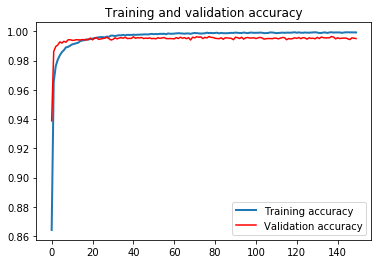

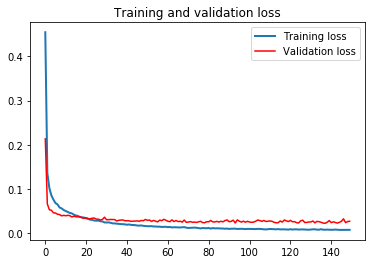

In [ ]:
import matplotlib.pyplot as plt
score = kmodel.evaluate(test_images, yt, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

accuracy = kmodelHistory.history['acc']
val_accuracy = kmodelHistory.history['val_acc']
loss = kmodelHistory.history['loss']
val_loss = kmodelHistory.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '-', label='Training accuracy',linewidth=2)
plt.plot(epochs, val_accuracy, 'g',c='red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '-', label='Training loss',linewidth=2)
plt.plot(epochs, val_loss, 'b',c='red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Architecture With my activation**

In [ ]:
from __future__ import print_function

import os


import numpy as np

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (Activation, Conv2D,GlobalAveragePooling2D, Dense, Dropout, Flatten,AvgPool2D,MaxPooling2D,LeakyReLU,Input,Concatenate,Subtract)
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.python.keras.utils import np_utils

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.datasets import cifar10


# --- Parameters
np.random.seed(1)

run_in_theano = False
#use_ocl = True
presentation_time = 0.15
n_presentations = 100
subtract_pixel_mean = True
# --- Load data
img_rows, img_cols = 32, 32
n_classes = 10

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
data_format = 'channels_last'




# Input image dimensions.
input_shape = X_train.shape[1:]

# Normalize data.
X_train = X_train.astype('float32') #/ 255.
X_test = X_test.astype('float32') #/ 255.

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    mean=np.mean(X_train)
    std=np.std(X_train)
    X_test=(X_test-mean)/std
    X_train=(X_train-mean)/std



# Convert class vectors to binary class matrices.
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('y_train shape:', Y_train.shape)


print(input_shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 10)
(32, 32, 3)


In [ ]:
from keras import backend as K
from keras import backend as K
import tensorflow as tf
alpha=.025
beta=.05
def sig(x):
    #return tf.math.softplus(x)* tf.math.tanh(tf.math.softplus(x))
    return tf.math.softplus(x)* tf.math.sigmoid(tf.math.softplus(x))
    #return K.softplus(x)
def Myactiv(x):
    #return (K.sigmoid(beta * x) * alpha *x)
    #return K.relu(K.exp(x*alpha/2))
    #return (K.sigmoid( x*.092) )
    return sig(x)
    #return (K.relu(x) )
    #return (alpha*x * K.sigmoid(x*alpha))- K.relu(x)

def LiSHT(x):
    return x * K.tanh(x)

from keras.utils.generic_utils import get_custom_objects

get_custom_objects().update({'Myactiv': Activation(Myactiv)})
#get_custom_objects().update({'LiSHT': Activation(LiSHT)})

Using TensorFlow backend.


In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (Add,Reshape,Activation, Conv2D,GlobalAveragePooling2D, Dense, Dropout, Flatten,AvgPool2D,MaxPooling2D,LeakyReLU,Input,Concatenate,Subtract)
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import os
#import tensorflow.contrib as tf_contrib
from tensorflow.keras.layers import BatchNormalization
import keras
from random import randint
data_format = 'channels_last'
kernel_size1 = (5, 5)  # shape of each convolutional filter
kernel_size2 = (3, 3)
kernel_size3 = (1, 1)
num_classes = 10
weight_decay=1e-12

#activity_regularizer=keras.regularizers.l1(0.01)
#weight_init = tf_contrib.layers.variance_scaling_initializer()
#weight_regularizer = tf_contrib.layers.l2_regularizer(0.0001)
depth=6
#reg=keras.regularizers.l2(weight_decay)
reg=None
softlif_params = dict(sigma=0.01, amplitude=0.063, tau_rc=0.059, tau_ref=0.008)


input_shape = X_train.shape[1:]
print(input_shape)
print(np.shape(X_train), np.shape(Y_train) )
print(np.shape(X_test), np.shape(Y_test) )


    # construct Keras model
def drplayer(x,x1,x2,val):
    x1=Dropout(val)(x1)
    x2=Dropout(val)(x2)
    x=Dropout(val)(x)

    return x,x1,x2

def reductionDemension(X,X1,X2):
    x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(X1)
    x2=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(X2)
    x=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(X)
    return x,x1,x2

def block_level1(inputX,l1,l2):
    inputX=BatchNormalization()(inputX)
    x1=Conv2D(l1, kernel_size1, padding='same', strides=(1, 1), data_format=data_format, kernel_regularizer=reg)(inputX)
    x2=Conv2D(l2, kernel_size2, padding='same', strides=(1, 1), data_format=data_format, kernel_regularizer=reg)(inputX)
    x=Conv2D(l2, kernel_size3, padding='same', strides=(1, 1), data_format=data_format, kernel_regularizer=reg)(inputX)
    
    
    x1=SoftLIF(**softlif_params)(x1)
    x2=SoftLIF(**softlif_params)(x2)
    x=SoftLIF(**softlif_params)(x)
    
    
    return x,x1,x2

def block_tri_level(inputX,inputX1,inputX2,l1,l2):
    inputX1=BatchNormalization(axis=-1)(inputX1)
    inputX2=BatchNormalization(axis=-1)(inputX2)
    inputX=BatchNormalization(axis=-1)(inputX)

    C=Concatenate(axis=3)([inputX1,inputX2])
   
    x1=Conv2D(l1, kernel_size1, padding='same',activation=Myactiv, data_format=data_format,kernel_regularizer=reg, strides=(1, 1))(C)
    x2=Conv2D(l2, kernel_size2, padding='same',activation=Myactiv, data_format=data_format,kernel_regularizer=reg,strides=(1, 1))(inputX2)
    x=Conv2D(l2, kernel_size3, padding='same',activation=Myactiv, data_format=data_format,kernel_regularizer=reg,strides=(1, 1))(inputX)
  
    
    
    x1=SoftLIF(**softlif_params)(x1)
    x2=SoftLIF(**softlif_params)(x2)
    x=SoftLIF(**softlif_params)(x)
    
    
    return x,x1,x2

inputs = Input(shape=input_shape)
val=.25
nbfilters=16
def make_model(input_shape):

  inputs = Input(shape=input_shape)
  x=GaussianNoise(0.1, input_shape=input_shape)(inputs)

  xx,x0,x1=block_level1(inputs,nbfilters,nbfilters)
  xx,x0,x1=drplayer(xx,x0,x1,val)
  #x111=Concatenate(axis=3)([x0,x1])
  l=0
  for i in range(depth):
    if depth%2==0:
      l+=2
    xx,x0,x1=block_tri_level(xx,x0,x1,nbfilters*l,nbfilters*l)
    xx,x0,x1=reductionDemension(xx,x0,x1)
    xx,x0,x1=drplayer(xx,x0,x1,val)

  
  

  


  x=Concatenate(axis=3)([x0,xx,x1])
 
  

  
  x=(Flatten()(x))
  
   

  
  x=Dense(512,kernel_regularizer=reg)(x)
  x=SoftLIF(**softlif_params)(x)
  #x=BatchNormalization()(x)
  x=Dropout(0.25)(x)
  
  x=Dense(256,kernel_regularizer=reg)(x)
  #x=SoftLIF(**softlif_params)(x)
  #x=BatchNormalization()(x)
  
  x=Dropout(0.5)(x)
  x=Dense(num_classes, activation='softmax',kernel_regularizer=reg)(x)

  kmodel = Model(inputs, x)
  
  kmodel.summary()
  
  return kmodel



#lrr=1e-4
## compile and fit Keras model
#optimizer = tensorflow.keras.optimizers.Nadam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)
#kmodel.compile(loss='categorical_crossentropy',           optimizer=optimizer,         metrics=['accuracy'])
#kmodelHistory=kmodel.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

#score = kmodel.evaluate(X_test, Y_test, verbose=0)
#print('Test score:', score[0])
#print('Test accuracy:', score[1])




Using TensorFlow backend.


NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
epochs=200
learning_rate=3e-4
batch_size=128
data_augmentation=True
#strategy = tf.distribute.experimental.TPUStrategy(resolver)
inputImag=X_train.shape[1:]
print("profondeur:",depth)
# prepare model model saving directory
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_ZNET_model.{epoch:03d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

import math
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop =10.0
    lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
  #if lrate<0.00015:
  #  lrate=0.00073
    print('Learning rate: ', lrate)
    return lrate

lrate=LearningRateScheduler(step_decay) 
# prepare callbacks for model saving and for learning rate reducer



#callbacks = [checkpoint, lr_scheduler]

#callbacks = [lr_scheduler]

lrr=1e-4
#epochs=150

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-2
    if epoch > 180:
        lr *= 0.1e-3
    #elif epoch > 170:
    #    lr *= 0.5e-3
    elif epoch > 160:
        lr *= 0.3e-3
    elif epoch > 130:
        lr *= 0.1e-2
    elif epoch > 110:
        lr *= 0.3e-2
    elif epoch > 90:
        lr *= 0.1e-1
    elif epoch > 70:
        lr *= 0.3e-1
    elif epoch > 40:
        lr *= 1e-1
    elif epoch > 20:
        lr *= 3e-1
    print('Learning rate: ', lr)
    return lr

def lr_schedule_1(epoch):
    if epoch > 26:
        lrate = 0.0001
    elif epoch > 23:
        lrate = 0.0002
    elif epoch > 18:
        lrate = 0.0003
    elif epoch > 13:
        lrate = 0.0005
    else:
        lrate = 0.001
         
    return lrate
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)



model =  make_model(inputImag)
#model_optimizer=tensorflow.keras.optimizers.Nadam(lr=lr_schedule(0), beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)
model_optimizer=tensorflow.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(
      optimizer=model_optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',
#              optimizer=tensorflow.keras.optimizers.Adam(lr=lr_schedule(0)),
#              metrics=['accuracy'])
lr_schedule_0 = LearningRateScheduler(lr_schedule)
callbacks = [lr_reducer, lr_schedule_0, checkpoint]
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(
      X_train, Y_train,
      epochs=epochs,
      batch_size=120,
      validation_data=(X_test, Y_test), verbose=1,shuffle=True,callbacks=callbacks)

else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        
       
        #shear_range=0.2,
        rotation_range=15,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3
        #brightness_range=[0.4,1.0]
        #zoom_range=[0.15,1.0]
    )  # randomly flip images

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    history2=model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                        validation_data=(X_test, Y_test),
                        steps_per_epoch=len(X_train)/batch_size,
                        epochs=epochs, shuffle=True,verbose=1,
                        callbacks=callbacks)
   
    
    

#validation_freq=5,

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

profondeur: 6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 1

# **VIZULISATION **

In [ ]:
import json
import os
from collections import OrderedDict

import keras.backend as K
from keras.models import Model


def n_(node, output_format_):
    node_name = str(node.name)
    if output_format_ == 'simple':
        if '/' in node_name:
            return node_name.split('/')[0]
        elif ':' in node_name:
            return node_name.split(':')[0]
        else:
            return node_name
    return node_name


def _evaluate(model: Model, nodes_to_evaluate, x, y=None, auto_compile=False):
    if not model._is_compiled:
        if model.name in ['vgg16', 'vgg19', 'inception_v3', 'inception_resnet_v2', 'mobilenet_v2', 'mobilenetv2']:
            print('Transfer learning detected. Model will be compiled with ("categorical_crossentropy", "adam").')
            print('If you want to change the default behaviour, then do in python:')
            print('model.name = ""')
            print('Then compile your model with whatever loss you want: https://keras.io/models/model/#compile.')
            print('If you want to get rid of this message, add this line before calling keract:')
            print('model.compile(loss="categorical_crossentropy", optimizer="adam")')
            model.compile(loss='categorical_crossentropy', optimizer='adam')
        else:
            if auto_compile:
                model.compile(loss='mse', optimizer='adam')
            else:
                print('Please compile your model first! https://keras.io/models/model/#compile.')
                print('If you only care about the activations (outputs of the layers), '
                      'then just compile your model like that:')
                print('model.compile(loss="mse", optimizer="adam")')
                raise Exception('Compilation of the model required.')

    def eval_fn(k_inputs):
        return K.function(k_inputs, nodes_to_evaluate)(model._standardize_user_data(x, y))

    try:
        return eval_fn(model._feed_inputs + model._feed_targets + model._feed_sample_weights)
    except Exception:
        return eval_fn(model._feed_inputs)


def get_gradients_of_trainable_weights(model, x, y):
    """
    Get the gradients of trainable_weights for the kernel and the bias nodes for all filters in each layer.
    Trainable_weights gradients are averaged over the minibatch.
    :param model: keras compiled model or one of ['vgg16', 'vgg19', 'inception_v3', 'inception_resnet_v2',
    'mobilenet_v2', 'mobilenetv2']
    :param x: inputs for which gradients are sought (averaged over all inputs if batch_size > 1)
    :param y: outputs for which gradients are sought
    :return: dict mapping layers to corresponding gradients (filter_h, filter_w, in_channels, out_channels)
    """
    nodes = model.trainable_weights
    nodes_names = [w.name for w in nodes]
    return _get_gradients(model, x, y, nodes, nodes_names)


def get_gradients_of_activations(model, x, y, layer_name=None, output_format='simple'):
    """
    Get gradients of the outputs of the activation functions, regarding the loss.
    Intuitively, it shows how your activation maps change over a tiny modification of the loss.
    :param model: keras compiled model or one of ['vgg16', 'vgg19', 'inception_v3', 'inception_resnet_v2',
    'mobilenet_v2', 'mobilenetv2'].
    :param x: Model input (Numpy array). In the case of multi-inputs, x should be of type List.
    :param y: Model target (Numpy array). In the case of multi-inputs, y should be of type List.
    :param layer_name: (optional) Name of a layer for which activations should be returned only. It is useful in
    very big networks when it is computationally expensive to evaluate all the layers/nodes.
    :param output_format: Change the output dictionary key of the function.
    - 'simple': output key will match the names of the Keras layers. For example Dense(1, name='d1') will
    return {'d1': ...}.
    - 'full': output key will match the full name of the output layer name. In the example above, it will
    return {'d1/BiasAdd:0': ...}.
    - 'numbered': output key will be an index range, based on the order of definition of each layer within the model.
    :return: Dict {layer_name (specified by output_format) -> activation of the layer output/node (Numpy array)}.
    """
    nodes = [layer.output for layer in model.layers if layer.name == layer_name or layer_name is None]
    return _get_gradients(model, x, y, nodes, output_format)


def _get_gradients(model, x, y, nodes, output_format):
    if model.optimizer is None:
        raise Exception('Please compile the model first. The loss function is required to compute the gradients.')
    try:
        grads = model.optimizer.get_gradients(model.total_loss, nodes)
    except ValueError as e:
        if 'differentiable' in str(e):
            # Probably one of the gradients operations is not differentiable...
            grads = []
            differentiable_nodes = []
            for n in nodes:
                try:
                    grads.extend(model.optimizer.get_gradients(model.total_loss, n))
                    differentiable_nodes.append(n)
                except ValueError:
                    pass
            nodes = differentiable_nodes
        else:
            raise e

    gradients_values = _evaluate(model, grads, x, y)
    nodes_names = [n_(n, output_format) for n in nodes]
    if len(set(nodes_names)) != len(nodes):  # collision detected.
        nodes_names = [n_(n, 'full') for n in nodes]
    return OrderedDict(zip(nodes_names, gradients_values))


def get_activations(model, x, layer_name=None, nodes_to_evaluate=None,
                    output_format='simple', auto_compile=True):
    """
    Fetch activations (nodes/layers outputs as Numpy arrays) for a Keras model and an input X.
    By default, all the activations for all the layers are returned.
    :param model: Keras compiled model or one of ['vgg16', 'vgg19', 'inception_v3', 'inception_resnet_v2',
    'mobilenet_v2', 'mobilenetv2', ...].
    :param x: Model input (Numpy array). In the case of multi-inputs, x should be of type List.
    :param layer_name: (optional) Name of a layer for which activations should be returned only. It is useful in
    very big networks when it is computationally expensive to evaluate all the layers/nodes.
    :param nodes_to_evaluate: (optional) List of Keras nodes to be evaluated. Useful when the nodes are not
    in model.layers.
    :param output_format: Change the output dictionary key of the function.
    - 'simple': output key will match the names of the Keras layers. For example Dense(1, name='d1') will
    return {'d1': ...}.
    - 'full': output key will match the full name of the output layer name. In the example above, it will
    return {'d1/BiasAdd:0': ...}.
    - 'numbered': output key will be an index range, based on the order of definition of each layer within the model.
    :param auto_compile: If set to True, will auto-compile the model if needed.
    :return: Dict {layer_name (specified by output_format) -> activation of the layer output/node (Numpy array)}.
    """
    if nodes_to_evaluate is None:
        nodes = [layer.output for layer in model.layers if layer.name == layer_name or layer_name is None]
    else:
        if layer_name is not None:
            raise ValueError('Do not specify a [layer_name] with [nodes_to_evaluate]. It will not be used.')
        nodes = nodes_to_evaluate

    if len(nodes) == 0:
        if layer_name is not None:
            network_layers = ', '.join([layer.name for layer in model.layers])
            raise KeyError('Could not find a layer with name: [{}]. '
                           'Network layers are [{}]'.format(layer_name, network_layers))
        else:
            raise ValueError('Nodes list is empty. Or maybe the model is empty.')

    # The placeholders are processed later (Inputs node in Keras). Due to a small bug in tensorflow.
    input_layer_outputs, layer_outputs = [], []
    [input_layer_outputs.append(node) if 'input_' in node.name else layer_outputs.append(node) for node in nodes]
    activations = _evaluate(model, layer_outputs, x, y=None, auto_compile=auto_compile)

    def craft_output(output_format_):
        activations_dict = OrderedDict(zip([n_(output, output_format_) for output in layer_outputs], activations))
        activations_inputs_dict = OrderedDict(zip([n_(output, output_format_) for output in input_layer_outputs], x))
        result_ = activations_inputs_dict.copy()
        result_.update(activations_dict)
        if output_format_ == 'numbered':
            result_ = OrderedDict([(i, v) for i, (k, v) in enumerate(result_.items())])
        return result_

    result = craft_output(output_format)
    if nodes_to_evaluate is not None and len(result) != len(nodes_to_evaluate):
        result = craft_output(output_format_='full')  # collision detected in the keys.

    return result


def display_activations(activations, cmap=None, save=False, directory='.', data_format='channels_last'):
    """
    Plot the activations for each layer using matplotlib
    :param activations: dict - mapping layers to corresponding activations (1, output_h, output_w, num_filters)
    :param cmap: string - a valid matplotlib colormap to be used
    :param save: bool - if the plot should be saved
    :param directory: string - where to store the activations (if save is True)
    :param data_format: string - one of "channels_last" (default) or "channels_first".
    The ordering of the dimensions in the inputs. "channels_last" corresponds to inputs with
    shape (batch, steps, channels) (default format for temporal data in Keras) while "channels_first"
    corresponds to inputs with shape (batch, channels, steps).
    :return: None
    """
    import matplotlib.pyplot as plt
    import math
    index = 0
    for layer_name, acts in activations.items():
        print(layer_name, acts.shape, end=' ')
        if acts.shape[0] != 1:
            print('-> Skipped. First dimension is not 1.')
            continue

        print('')
        # channel first
        if data_format == 'channels_last':
            c = -1
        elif data_format == 'channels_first':
            c = 1
        else:
            raise Exception('Unknown data_format.')

        nrows = int(math.sqrt(acts.shape[c]) - 0.001) + 1  # best square fit for the given number
        ncols = int(math.ceil(acts.shape[c] / nrows))
        hmap = None
        if len(acts.shape) <= 2:
            """
            print('-> Skipped. 2D Activations.')
            continue
            """
            # no channel
            fig, axes = plt.subplots(1, 1, squeeze=False, figsize=(24, 24))
            img = acts[0, :]
            hmap = axes.flat[0].imshow([img], cmap=cmap)
            axes.flat[0].axis('off')
        else:
            fig, axes = plt.subplots(nrows, ncols, squeeze=False, figsize=(24, 24))
            for i in range(nrows * ncols):
                if i < acts.shape[c]:
                    if len(acts.shape) == 3:
                        if data_format == 'channels_last':
                            img = acts[0, :, i]
                        elif data_format == 'channels_first':
                            img = acts[0, i, :]
                        else:
                            raise Exception('Unknown data_format.')
                        hmap = axes.flat[i].imshow([img], cmap=cmap)
                    elif len(acts.shape) == 4:
                        if data_format == 'channels_last':
                            img = acts[0, :, :, i]
                        elif data_format == 'channels_first':
                            img = acts[0, i, :, :]
                        else:
                            raise Exception('Unknown data_format.')
                        hmap = axes.flat[i].imshow(img, cmap=cmap)
                axes.flat[i].axis('off')
        fig.suptitle(layer_name)
        fig.subplots_adjust(right=0.8)
        cbar = fig.add_axes([0.85, 0.15, 0.03, 0.7])
        fig.colorbar(hmap, cax=cbar)
        if save:
            if not os.path.exists(directory):
                os.makedirs(directory)
            output_filename = os.path.join(directory, '{0}_{1}.png'.format(index, layer_name.split('/')[0]))
            plt.savefig(output_filename, bbox_inches='tight')
        else:
            plt.show()
        # pyplot figures require manual closing
        index += 1
        plt.close(fig)


def display_heatmaps(activations, input_image, directory='.', save=False, fix=True):
    """
    Plot heatmaps of activations for all filters overlayed on the input image for each layer
    :param activations: dict mapping layers to corresponding activations with the shape
    (1, output height, output width, number of filters)
    :param input_image: numpy array, input image for the overlay
    :param save: bool, if the plot should be saved
    :param fix: bool, if automated checks and fixes for incorrect images should be run
    :param directory: string - where to store the activations (if save is True)
    :return: None
    """
    from PIL import Image
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np
    import math

    data_format = K.image_data_format()
    if fix:
        # fixes common errors made when passing the image
        # I recommend the use of keras' load_img function passed to np.array to ensure
        # images are loaded in in the correct format
        # removes the batch size from the shape
        if len(input_image.shape) == 4:
            input_image = input_image.reshape(input_image.shape[1], input_image.shape[2], input_image.shape[3])
        # removes channels from the shape of grayscale images
        if len(input_image.shape) == 3 and input_image.shape[2] == 1:
            input_image = input_image.reshape(input_image.shape[0], input_image.shape[1])

    index = 0
    for layer_name, acts in activations.items():
        print(layer_name, acts.shape, end=' ')
        if acts.shape[0] != 1:
            print('-> Skipped. First dimension is not 1.')
            continue
        if len(acts.shape) <= 2:
            print('-> Skipped. 2D Activations.')
            continue
        print('')
        nrows = int(math.sqrt(acts.shape[-1]) - 0.001) + 1  # best square fit for the given number
        ncols = int(math.ceil(acts.shape[-1] / nrows))
        fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
        fig.suptitle(layer_name)

        # computes values required to scale the activations (which will form our heat map) to be in range 0-1
        scaler = MinMaxScaler()
        # reshapes to be 2D with an automaticly calculated first dimension and second
        # dimension of 1 in order to keep scikitlearn happy
        scaler.fit(acts.reshape(-1, 1))

        # loops over each filter/neuron
        for i in range(nrows * ncols):
            if i < acts.shape[-1]:
                if len(acts.shape) == 3:
                    # gets the activation of the ith layer
                    if data_format == 'channels_last':
                        img = acts[0, :, i]
                    elif data_format == 'channels_first':
                        img = acts[0, i, :]
                    else:
                        raise Exception('Unknown data_format.')
                elif len(acts.shape) == 4:
                    if data_format == 'channels_last':
                        img = acts[0, :, :, i]
                    elif data_format == 'channels_first':
                        img = acts[0, i, :, :]
                    else:
                        raise Exception('Unknown data_format.')
                else:
                    raise Exception('Expect a tensor of 3 or 4 dimensions.')

                # scales the activation (which will form our heat map) to be in range 0-1 using
                # the previously calculated statistics
                if len(img.shape) == 1:
                    img = scaler.transform(img.reshape(-1, 1))
                else:
                    img = scaler.transform(img)
                # print(img.shape)
                img = Image.fromarray(img)
                # resizes the activation to be same dimensions of input_image
                img = img.resize((input_image.shape[0], input_image.shape[1]), Image.LANCZOS)
                img = np.array(img)
                axes.flat[i].imshow(input_image / 255.0)
                # overlay the activation at 70% transparency  onto the image with a heatmap colour scheme
                # Lowest activations are dark, highest are dark red, mid are yellow
                axes.flat[i].imshow(img, alpha=0.3, cmap='jet', interpolation='bilinear')
            axes.flat[i].axis('off')
        if save:
            if not os.path.exists(directory):
                os.makedirs(directory)
            output_filename = os.path.join(directory, '{0}_{1}.png'.format(index, layer_name.split('/')[0]))
            plt.savefig(output_filename, bbox_inches='tight')
        else:
            plt.show()
        index += 1
        plt.close(fig)


def display_gradients_of_trainable_weights(gradients, directory='.', save=False):
    """
    Plot in_channels by out_channels grid of grad heatmaps each of dimensions (filter_h, filter_w)
    :param gradients: dict mapping layers to corresponding gradients (filter_h, filter_w, in_channels, out_channels)
    :param save: bool- if the plot should be saved
    :param directory: string - where to store the activations (if save is True)
    :return: None
    """
    import matplotlib.pyplot as plt

    index = 0
    for layer_name, grads in gradients.items():
        if len(grads.shape) != 4:
            print(layer_name, ": Expected dimensions (filter_h, filter_w, in_channels, out_channels). Got ",
                  grads.shape)
            continue
        print(layer_name, grads.shape)
        nrows = grads.shape[-1]
        ncols = grads.shape[-2]
        fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
        fig.suptitle(layer_name)
        hmap = None
        for i in range(nrows):
            for j in range(ncols):
                g = grads[:, :, j, i]
                hmap = axes[i, j].imshow(g, aspect='auto')  # May cause distortion in case of in_out channel difference
                axes[i, j].axis('off')
        fig.subplots_adjust(right=0.8, wspace=0.02, hspace=0.3)
        cbar = fig.add_axes([0.85, 0.15, 0.03, 0.7])
        fig.colorbar(hmap, cax=cbar)
        if save:
            if not os.path.exists(directory):
                os.makedirs(directory)
            output_filename = os.path.join(directory, '{0}_{1}.png'.format(index, layer_name.split('/')[0]))
            plt.savefig(output_filename, bbox_inches='tight')
        else:
            plt.show()
        index += 1
        plt.close(fig)


def persist_to_json_file(activations, filename):
    """
    Persist the activations to the disk
    :param activations: activations (dict mapping layers)
    :param filename: output filename (JSON format)
    :return: None
    """
    with open(filename, 'w') as w:
        json.dump(fp=w, obj=OrderedDict({k: v.tolist() for k, v in activations.items()}), indent=2, sort_keys=False)


def load_activations_from_json_file(filename):
    """
    Read the activations from the disk
    :param filename: filename to read the activations from (JSON format)
    :return: activations (dict mapping layers)
    """
    import numpy as np
    with open(filename, 'r') as r:
        d = json.load(r, object_pairs_hook=OrderedDict)
        activations = OrderedDict({k: np.array(v) for k, v in d.items()})
        return activations

# **Architecture ZCNN Image score**

In [ ]:

import numpy as np
#from keras.optimizers import Nadam,Adam
from tensorflow.keras.datasets import mnist

#import numpy as np
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (Activation, Conv2D,GlobalAveragePooling2D, Dense, Dropout, Flatten,AvgPool2D,MaxPooling2D,LeakyReLU,Input,Concatenate,Subtract)
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.python.keras.utils import np_utils

from tensorflow.keras.layers import BatchNormalization
import keras

np.random.seed(0)

import numpy as np
from keras.optimizers import Nadam,Adam
from tensorflow.keras.datasets import mnist

batch_size = 128
epochs = 150
weight_decay=1e-4

n_filters = 32         # number of convolutional filters to use
kernel_size1 = (3, 3)  # shape of each convolutional filter
kernel_size2 = (5, 5)
kernel_size3 = (1, 1)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = np.reshape(train_images,(60000,28,28,1))/255.0
test_images = np.reshape(test_images,(10000,28,28,1))/255.0

input_shape = train_images.shape[1:]
# convert class vectors to binary class matrices
#Y_train = np_utils.to_categorical(y_train, n_classes)
#Y_test = np_utils.to_categorical(y_test, n_classes)

    # construct Keras model
    
def block_level1(inputX,l1,l2):
    inputX=BatchNormalization()(inputX)
    x1=Conv2D(l1, kernel_size1, padding='same',activation='elu',strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX)
    x2=Conv2D(l2, kernel_size2, padding='same',activation='elu' ,strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX)
    
   
    x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x1)
    x2=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x2)
    
    x1=Dropout(0.25)(x1)
    x2=Dropout(0.25)(x2)
    
    return x1,x2

def block_tri_level(inputX1,inputX2,l1,l2):
    inputX1=BatchNormalization()(inputX1)
    inputX2=BatchNormalization()(inputX2)
    
    C=Concatenate(axis=3)([inputX1,inputX2])
    x1=Conv2D(l1, kernel_size1, padding='same',activation='elu', strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(C)
    x2=Conv2D(l2, kernel_size2, padding='same',activation='elu', strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX2)
    
    
    
   
    x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x1)
    x2=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x2)
    
    x1=Dropout(0.25)(x1)
    x2=Dropout(0.25)(x2)
    
    return x1,x2

inputs = Input(shape=input_shape)
#x=GaussianNoise(0.1, input_shape=input_shape)(inputs)

x1,x2=block_level1(inputs,256,256)
x1,x2=block_tri_level(x1,x2,128,128)
x1,x2=block_tri_level(x1,x2,64,64)
x=Concatenate(axis=3)([x1,x2])

x=Flatten()(x)

x=BatchNormalization()(x)
x=Dense(512,activation='relu')(x)
Dropout(0.25)(x)

x=BatchNormalization()(x)
x=Dense(256,activation='relu')(x)
Dropout(0.25)(x)


x=Dense(n_classes, activation='softmax')(x)

kmodel = Model(inputs, x)





kmodel.summary()

lrr=1e-4

#model_optimizer = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
lrr=1e-4
epochs=150
model_optimizer=tensorflow.keras.optimizers.Nadam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)

kmodel.compile(loss='categorical_crossentropy', optimizer=model_optimizer, metrics=['accuracy'])

#fashion_mnist = keras.datasets.fashion_mnist



y = np.zeros((60000,10))
y[np.arange(60000),train_labels]=1
yt = np.zeros((10000,10))
yt[np.arange(10000),test_labels]=1
print(yt.shape)
print(type(yt))

kmodelHistory=kmodel.fit(x=train_images, y=y, batch_size=120, epochs=150, verbose=1,validation_data=(test_images, yt))


# compile and fit Keras model
#optimizer = tensorflow.keras.optimizers.Nadam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)
#kmodel.compile(loss='categorical_crossentropy',           optimizer=optimizer,         metrics=['accuracy'])
#kmodelHistory=kmodel.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

score = kmodel.evaluate(test_images, yt, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])








 #model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
#		epochs=10, batch_size=64)
  

# compile and fit Keras model
#optimizer = tensorflow.keras.optimizers.Nadam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)
#kmodel.compile(loss='categorical_crossentropy',           optimizer=optimizer,         metrics=['accuracy'])
#kmodelHistory=kmodel.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

#score = kmodel.evaluate(test_images, yt, verbose=0)
#print('Test score:', score[0])
#print('Test accuracy:', score[1])




Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
batch_normalization_28 (BatchNo (None, 28, 28, 1)    4           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 28, 28, 256)  2560        batch_normalization_28[0][0]     
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 28, 28, 256)  6656        batch_normalization_28[0][0]     
____________________________________________________________________________________________

# > Densenet MNIST score

In [ ]:

import keras
from keras.models import Model
from keras.layers import Input, GlobalAveragePooling2D, Dense, concatenate, AveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Dropout
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.optimizers import Nadam,Adam
from tensorflow.keras.datasets import mnist
class DenseNet:
    def __init__(self, input_shape=None, dense_blocks=3, dense_layers=-1, growth_rate=12, nb_classes=None,
                 dropout_rate=None, bottleneck=False, compression=1.0, weight_decay=1e-4, depth=40):

        # Checks
        if nb_classes == None:
            raise Exception( 'Please define number of classes (e.g. num_classes=10). This is required for final softmax.')

        if compression <= 0.0 or compression > 1.0:
            raise Exception('Compression have to be a value between 0.0 and 1.0.')

        if type(dense_layers) is list:
            if len(dense_layers) != dense_blocks:
                raise AssertionError('Number of dense blocks have to be same length to specified layers')
        elif dense_layers == -1:
            dense_layers = int((depth - 4) / 3)
            if bottleneck:
                dense_layers = int(dense_layers / 2)
            dense_layers = [dense_layers for _ in range(dense_blocks)]
        else:
            dense_layers = [dense_layers for _ in range(dense_blocks)]

        self.dense_blocks = dense_blocks
        self.dense_layers = dense_layers
        self.input_shape = input_shape
        self.growth_rate = growth_rate
        self.weight_decay = weight_decay
        self.dropout_rate = dropout_rate
        self.bottleneck = bottleneck
        self.compression = compression
        self.nb_classes = nb_classes
        
    def build_model(self):
        img_input = Input(shape=self.input_shape, name='img_input')
        nb_channels = self.growth_rate
        
        x = Conv2D(2*self.growth_rate, (3,3), 
                   padding='same', strides = (1,1), 
                   kernel_regularizer=keras.regularizers.l2(self.weight_decay))(img_input)
        
        for block in range(self.dense_blocks-1):
            x, nb_channels = self.dense_block(x, self.dense_layers[block], nb_channels, self.growth_rate,
                                              self.dropout_rate, self.bottleneck, self.weight_decay)
            
            x = self.transition_layer(x, nb_channels, self.dropout_rate, self.compression, self.weight_decay)
            nb_channels = int(nb_channels*self.compression)
            
        x, nb_channels = self.dense_block(x, self.dense_layers[-1], nb_channels, self.growth_rate, self.dropout_rate, self.weight_decay)
        
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = GlobalAveragePooling2D()(x)
        prediction = Dense(self.nb_classes, activation='softmax')(x)
        
        return Model(inputs=img_input, outputs=prediction, name='densenet')
        
    def dense_block(self, x, nb_layers, nb_channels, growth_rate, dropout_rate=None, bottleneck=False, weight_decay=1e-4):
        for i in range(nb_layers):
            cb = self.convolution_block(x, growth_rate, dropout_rate, bottleneck)
            nb_channels += growth_rate
            x = concatenate([cb,x])
            
        return x, nb_channels
    
    def convolution_block(self, x, nb_channels, dropout_rate=None, bottleneck=False, weight_decay=1e-4):       

        # Bottleneck
        if bottleneck:
            bottleneckWidth = 4
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            x = Conv2D(nb_channels * bottleneckWidth, (1, 1),
                                     kernel_regularizer=keras.regularizers.l2(weight_decay))(x)
            # Dropout
            if dropout_rate:
                x = Dropout(dropout_rate)(x)

        # Standard (BN-ReLU-Conv)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(nb_channels, (3, 3), padding='same')(x)

        # Dropout
        if dropout_rate:
            x = Dropout(dropout_rate)(x)

        return x

    def transition_layer(self, x, nb_channels, dropout_rate=None, compression=1.0, weight_decay=1e-4):
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(int(nb_channels * compression), (1, 1), padding='same',
                                 kernel_regularizer=keras.regularizers.l2(weight_decay))(x)

        # Adding dropout
        if dropout_rate:
            x = Dropout(dropout_rate)(x)

        x = AveragePooling2D((2, 2), strides=(2, 2))(x)
        return x
    
    
densenet = DenseNet((28,28,1), nb_classes=10, depth=35)

model = densenet.build_model()

#model_optimizer = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
lrr=1e-4
epochs=150
model_optimizer=Adam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)

model.compile(loss='categorical_crossentropy', optimizer=model_optimizer, metrics=['accuracy'])

#fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = np.reshape(train_images,(60000,28,28,1))
test_images = np.reshape(test_images,(10000,28,28,1))

y = np.zeros((60000,10))
y[np.arange(60000),train_labels]=1
yt = np.zeros((10000,10))
yt[np.arange(10000),test_labels]=1
print(yt.shape)
print(type(yt))

model.fit(x=train_images, y=y, batch_size=100, epochs=150, verbose=1,validation_data=(test_images, yt))
#model.fit(X_train, y, batch_size=batch_size, epochs=epochs, verbose=1)#, validation_data=(X_test, Y_test))

(10000, 10)
<class 'numpy.ndarray'>
Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 65s 1ms/step - loss: 0.5327 - acc: 0.9151 - val_loss: 0.2156 - val_acc: 0.9747
Epoch 2/150
60000/60000 [==============================] - 53s 887us/step - loss: 0.1722 - acc: 0.9857 - val_loss: 0.1928 - val_acc: 0.9755
Epoch 3/150
60000/60000 [==============================] - 53s 889us/step - loss: 0.1421 - acc: 0.9895 - val_loss: 0.1495 - val_acc: 0.9843
Epoch 4/150
60000/60000 [==============================] - 53s 889us/step - loss: 0.1227 - acc: 0.9918 - val_loss: 0.1814 - val_acc: 0.9728
Epoch 5/150
60000/60000 [==============================] - 53s 887us/step - loss: 0.1107 - acc: 0.9928 - val_loss: 0.1767 - val_acc: 0.9676
Epoch 6/150
60000/60000 [==============================] - 53s 885us/step - loss: 0.0999 - acc: 0.9940 - val_loss: 0.3710 - val_acc: 0.8997
Epoch 7/150
60000/60000 [==============================] - 54s 892us/step - 

In [ ]:
import matplotlib.pyplot as plt
score = model.evaluate(X_testM, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

accuracy = kmodelHistory.history['accuracy']
val_accuracy = kmodelHistory.history['val_accuracy']
loss = kmodelHistory.history['loss']
val_loss = kmodelHistory.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '-', label='Training accuracy',linewidth=2)
plt.plot(epochs, val_accuracy, 'g',c='red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '-', label='Training loss',linewidth=2)
plt.plot(epochs, val_loss, 'b',c='red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:

import keras
from keras.models import Model
from keras.layers import Input, GlobalAveragePooling2D, Dense, concatenate, AveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Dropout
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.optimizers import Nadam,Adam
from tensorflow.keras.datasets import mnist
class DenseNet:
    def __init__(self, input_shape=None, dense_blocks=3, dense_layers=-1, growth_rate=12, nb_classes=None,
                 dropout_rate=None, bottleneck=False, compression=1.0, weight_decay=1e-4, depth=40):

        # Checks
        if nb_classes == None:
            raise Exception( 'Please define number of classes (e.g. num_classes=10). This is required for final softmax.')

        if compression <= 0.0 or compression > 1.0:
            raise Exception('Compression have to be a value between 0.0 and 1.0.')

        if type(dense_layers) is list:
            if len(dense_layers) != dense_blocks:
                raise AssertionError('Number of dense blocks have to be same length to specified layers')
        elif dense_layers == -1:
            dense_layers = int((depth - 4) / 3)
            if bottleneck:
                dense_layers = int(dense_layers / 2)
            dense_layers = [dense_layers for _ in range(dense_blocks)]
        else:
            dense_layers = [dense_layers for _ in range(dense_blocks)]

        self.dense_blocks = dense_blocks
        self.dense_layers = dense_layers
        self.input_shape = input_shape
        self.growth_rate = growth_rate
        self.weight_decay = weight_decay
        self.dropout_rate = dropout_rate
        self.bottleneck = bottleneck
        self.compression = compression
        self.nb_classes = nb_classes
        
    def build_model(self):
        img_input = Input(shape=self.input_shape, name='img_input')
        nb_channels = self.growth_rate
        
        x = Conv2D(2*self.growth_rate, (3,3), 
                   padding='same', strides = (1,1), 
                   kernel_regularizer=keras.regularizers.l2(self.weight_decay))(img_input)
        
        for block in range(self.dense_blocks-1):
            x, nb_channels = self.dense_block(x, self.dense_layers[block], nb_channels, self.growth_rate,
                                              self.dropout_rate, self.bottleneck, self.weight_decay)
            
            x = self.transition_layer(x, nb_channels, self.dropout_rate, self.compression, self.weight_decay)
            nb_channels = int(nb_channels*self.compression)
            
        x, nb_channels = self.dense_block(x, self.dense_layers[-1], nb_channels, self.growth_rate, self.dropout_rate, self.weight_decay)
        
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = GlobalAveragePooling2D()(x)
        prediction = Dense(self.nb_classes, activation='softmax')(x)
        
        return Model(inputs=img_input, outputs=prediction, name='densenet')
        
    def dense_block(self, x, nb_layers, nb_channels, growth_rate, dropout_rate=None, bottleneck=False, weight_decay=1e-4):
        for i in range(nb_layers):
            cb = self.convolution_block(x, growth_rate, dropout_rate, bottleneck)
            nb_channels += growth_rate
            x = concatenate([cb,x])
            
        return x, nb_channels
    
    def convolution_block(self, x, nb_channels, dropout_rate=None, bottleneck=False, weight_decay=1e-4):       

        # Bottleneck
        if bottleneck:
            bottleneckWidth = 4
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            x = Conv2D(nb_channels * bottleneckWidth, (1, 1),
                                     kernel_regularizer=keras.regularizers.l2(weight_decay))(x)
            # Dropout
            if dropout_rate:
                x = Dropout(dropout_rate)(x)

        # Standard (BN-ReLU-Conv)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(nb_channels, (3, 3), padding='same')(x)

        # Dropout
        if dropout_rate:
            x = Dropout(dropout_rate)(x)

        return x

    def transition_layer(self, x, nb_channels, dropout_rate=None, compression=1.0, weight_decay=1e-4):
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(int(nb_channels * compression), (1, 1), padding='same',
                                 kernel_regularizer=keras.regularizers.l2(weight_decay))(x)

        # Adding dropout
        if dropout_rate:
            x = Dropout(dropout_rate)(x)

        x = AveragePooling2D((2, 2), strides=(2, 2))(x)
        return x
    
    
densenet = DenseNet((28,28,1), nb_classes=10, depth=35)

model = densenet.build_model()

#model_optimizer = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
lrr=1e-4
epochs=150
model_optimizer=Adam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)

model.compile(loss='categorical_crossentropy', optimizer=model_optimizer, metrics=['accuracy'])

#fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = np.reshape(train_images,(60000,28,28,1))
test_images = np.reshape(test_images,(10000,28,28,1))

y = np.zeros((60000,10))
y[np.arange(60000),train_labels]=1
yt = np.zeros((10000,10))
yt[np.arange(10000),test_labels]=1
print(yt.shape)
print(type(yt))

model.fit(x=train_images, y=y, batch_size=100, epochs=150, verbose=1,validation_data=(test_images, yt))
#model.fit(X_train, y, batch_size=batch_size, epochs=epochs, verbose=1)#, validation_data=(X_test, Y_test))














(10000, 10)
<class 'numpy.ndarray'>
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/150
11600/60000 [====>.........................] - ETA: 1:37 - loss: 1.4941 - acc: 0.6841

KeyboardInterrupt: ignored

# **CIFAR Architecture en Z**

In [ ]:

import numpy as np
#from keras.optimizers import Nadam,Adam
from tensorflow.keras.datasets import mnist

#import numpy as np
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (Activation, Conv2D,GlobalAveragePooling2D, Dense, Dropout, Flatten,AvgPool2D,MaxPooling2D,LeakyReLU,Input,Concatenate,Subtract)
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.python.keras.utils import np_utils

from tensorflow.keras.layers import BatchNormalization
import keras

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

batch_size = 128
epochs = 150
weight_decay=1e-4

n_filters = 32         # number of convolutional filters to use
kernel_size1 = (3, 3)  # shape of each convolutional filter
kernel_size2 = (5, 5)
kernel_size3 = (1, 1)
num_classes = 10

print('x_train shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)




#train_images = np.reshape(train_images,(60000,28,28,1))
#test_images = np.reshape(test_images,(10000,28,28,1))

input_shape = train_images.shape[1:]
# convert class vectors to binary class matrices
#Y_train = np_utils.to_categorical(y_train, n_classes)
#Y_test = np_utils.to_categorical(y_test, n_classes)

    # construct Keras model
    
def block_level1(inputX,l1,l2):
    inputX=BatchNormalization()(inputX)
    x1=Conv2D(l1, kernel_size1, padding='same',activation='relu',strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX)
    x2=Conv2D(l2, kernel_size2, padding='same',activation='relu' ,strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX)
    
   
    x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x1)
    x2=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x2)
    
    x1=Dropout(0.25)(x1)
    x2=Dropout(0.25)(x2)
    
    return x1,x2

def block_tri_level(inputX1,inputX2,l1,l2):
    inputX1=BatchNormalization()(inputX1)
    inputX2=BatchNormalization()(inputX2)
    
    C=Concatenate(axis=3)([inputX1,inputX2])
    x1=Conv2D(l1, kernel_size1, padding='same',activation='relu', strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(C)
    x2=Conv2D(l2, kernel_size2, padding='same',activation='relu', strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX2)
    
    
    
   
    x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x1)
    x2=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x2)
    
    x1=Dropout(0.25)(x1)
    x2=Dropout(0.25)(x2)
    
    return x1,x2

inputs = Input(shape=input_shape)
#x=GaussianNoise(0.1, input_shape=input_shape)(inputs)

x1,x2=block_level1(inputs,256,128)
x1,x2=block_tri_level(x1,x2,64,32)
x1,x2=block_tri_level(x1,x2,45,16)
x=Concatenate(axis=3)([x1,x2])

x=Flatten()(x)

x=BatchNormalization()(x)
x=Dense(512,activation='relu')(x)
Dropout(0.25)(x)

x=BatchNormalization()(x)
x=Dense(256,activation='relu')(x)
Dropout(0.25)(x)


x=Dense(num_classes, activation='softmax')(x)

kmodel = Model(inputs, x)





kmodel.summary()

lrr=1e-4

#model_optimizer = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
lrr=1e-4
epochs=150
model_optimizer=tensorflow.keras.optimizers.Nadam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)

kmodel.compile(loss='categorical_crossentropy', optimizer=model_optimizer, metrics=['accuracy'])

#fashion_mnist = keras.datasets.fashion_mnist



train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
#train_images /= 255
#test_images /= 255

kmodelHistory=kmodel.fit(x=train_images, y=y_train, batch_size=120, epochs=150, verbose=1,validation_data=(test_images, y_test))


# compile and fit Keras model
#optimizer = tensorflow.keras.optimizers.Nadam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=lrr/epochs)
#kmodel.compile(loss='categorical_crossentropy',           optimizer=optimizer,         metrics=['accuracy'])
#kmodelHistory=kmodel.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

score = kmodel.evaluate(test_images, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])




x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
batch_normalization_38 (BatchNo (None, 32, 32, 3)    12          input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 32, 32, 256)  7168        batch_normalization_38[0][0]     
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 32, 32, 128)  9728        batch_normalization_38[0][0]     
___________________

# **Architecture en Z v3**

In [ ]:

import numpy as np
#from keras.optimizers import Nadam,Adam
from tensorflow.keras.datasets import mnist
import keras.backend as K
import os
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (Activation, Conv2D,GlobalAveragePooling2D, Dense, Dropout, Flatten,AvgPool2D,MaxPooling2D,LeakyReLU,Input,Concatenate,Subtract)
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop,Adam,Nadam

from tensorflow.keras.layers import BatchNormalization
import keras
import math


def preprocess_input(x, data_format=None):
    """Preprocesses a tensor encoding a batch of images.
    # Arguments
        x: input Numpy tensor, 4D.
        data_format: data format of the image tensor.
    # Returns
        Preprocessed tensor.
    """
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in {'channels_last', 'channels_first'}

    if data_format == 'channels_first':
        if x.ndim == 3:
            # 'RGB'->'BGR'
            x = x[::-1, ...]
            # Zero-center by mean pixel
            x[0, :, :] -= 103.939
            x[1, :, :] -= 116.779
            x[2, :, :] -= 123.68
        else:
            x = x[:, ::-1, ...]
            x[:, 0, :, :] -= 103.939
            x[:, 1, :, :] -= 116.779
            x[:, 2, :, :] -= 123.68
    else:
        # 'RGB'->'BGR'
        x = x[..., ::-1]
        # Zero-center by mean pixel
        x[..., 0] -= 103.939
        x[..., 1] -= 116.779
        x[..., 2] -= 123.68

    x *= 0.017 # scale values

    return x



(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX.astype('float32')
testX = testX.astype('float32')

#trainX = preprocess_input(trainX)
#testX = preprocess_input(testX)
nb_classes=10
Y_train = np_utils.to_categorical(trainY, nb_classes)
Y_test = np_utils.to_categorical(testY, nb_classes)

batch_size = 100
nb_epoch = 300
weight_decay=1e-5
data_format = 'channels_last'
n_filters = 32         # number of convolutional filters to use
kernel_size1 = (3, 3)  # shape of each convolutional filter
kernel_size2 = (5, 5)
kernel_size3 = (1, 1)
num_classes = 10


print('x_train shape:', trainX.shape)
#print(train_images.shape[0], 'train samples')
#print(test_images.shape[0], 'test samples')



# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(train_labels, num_classes)
#y_test = keras.utils.to_categorical(test_labels, num_classes)






#train_images = np.reshape(train_images,(60000,28,28,1))
#test_images = np.reshape(test_images,(10000,28,28,1))

input_shape = trainX.shape[1:]
# convert class vectors to binary class matrices
#Y_train = np_utils.to_categorical(y_train, n_classes)
#Y_test = np_utils.to_categorical(y_test, n_classes)

    # construct Keras model
    
def InitialInputblockLevel(n, inputX,l1,l2):
    outputD=[]
    inputX=BatchNormalization()(inputX)
    
    
    for i in range(n):
      x1=Conv2D(l1, (i+1,i+1), padding='same',activation='relu',strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX)
      x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x1)
    
      #x1=Dropout(0.25)(x1)
      
      outputD.append(x1)
    
    print("level1",outputD)
    return  outputD





def ConvBlock(inputX1,l1):
    
    
    x1=Conv2D(l1, kernel_size2, padding='same',activation='relu', strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(inputX1)
    
    
    x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x1)
    
    
    x1=Dropout(0.25)(x1)
   
    
    return x1

def AIJ(inputX1,inputX2,l2):
    
    #inputX11=BatchNormalization()(inputX1)
    #inputX21=BatchNormalization()(inputX2)

    C=Concatenate(axis=3)([inputX1,inputX2])
    x1=Conv2D(l2, kernel_size1, padding='same',activation='relu', strides=(1, 1), data_format=data_format,kernel_regularizer=keras.regularizers.l2(weight_decay))(C)
    x1=AvgPool2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=data_format)(x1)
    x1=Dropout(0.25)(x1)
    
    return x1
 
      
def blockCascade(n, inputsD,l1,l2):
    outputD=[]
    inputX11=BatchNormalization()(inputsD[0])
    x1=ConvBlock(inputX11,l1)
   

    outputD.append(x1)
    #outputD.append(x2)

    for i in range(1,n):
      inputX21=BatchNormalization()(inputsD[i])
      inputX11=BatchNormalization()(inputsD[i-1])
      x=AIJ(inputX11,inputX21,l2)
      
      outputD.append(x)
      

    return outputD

def networkEncascade(n,m, InputX,l1,l2):
    D=InitialInputblockLevel(m, InputX,128,128)
    LevelDD=[]
    LevelDD.append(D)
    for i in range(1,n):
      D=blockCascade(m, D,l1,l2)
      LevelDD.append(D)
    return  LevelDD[len(LevelDD)-1]





inputs = Input(shape=input_shape)
out=networkEncascade(2,2, inputs,64,32)
x=Concatenate(axis=3)(out)
x=BatchNormalization()(x)


x=Flatten()(x)

#x=BatchNormalization()(x)
x=Dense(512,activation='relu')(x)
Dropout(0.25)(x)

x=BatchNormalization()(x)
x=Dense(256,activation='relu')(x)
Dropout(0.25)(x)
x=Dense(num_classes, activation='softmax')(x)

kmodel = Model(inputs, x)
kmodel.summary()



#model_optimizer = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
lrr=1e-4

model_optimizer=tensorflow.keras.optimizers.Nadam(lr=lrr, beta_1=0.9, beta_2=0.999, epsilon=1e-09)#, decay=lrr/epochs)
#model_optimizer=RMSprop(1e-3)
#model_optimizer = Adam(lr=lrr) # Using Adam instead of SGD to speed up training
kmodel.compile(loss='categorical_crossentropy', optimizer=model_optimizer, metrics=["accuracy"])
print("Finished compiling")
print("Building model...")



#generator = ImageDataGenerator(rotation_range=15,
#                               width_shift_range=5./32,
#                               height_shift_range=5./32,
#                               horizontal_flip=True)

#generator.fit(trainX, seed=0)

# Load model
def step_decay(epoch):
    initial_lrate = 0.007
    drop = 0.75
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    print("learning rate:",lrate, "epoch :",epoch)
    return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

#model.fit_generator(generator.flow(trainX, Y_train, batch_size=batch_size),
#                    steps_per_epoch=len(trainX) // batch_size, epochs=nb_epoch,
#                    callbacks=callbacks,
#                    validation_data=(testX, Y_test),
#                    validation_steps=testX.shape[0] // batch_size, verbose=1)

kmodel.fit(trainX, Y_train, batch_size=batch_size, epochs=nb_epoch,
                    callbacks=callbacks_list, validation_data=(testX, Y_test), verbose=1)

yPreds = model.predict(testX)
yPred = np.argmax(yPreds, axis=1)
yTrue = testY

accuracy = metrics.accuracy_score(yTrue, yPred) * 100
error = 100 - accuracy
print("Accuracy : ", accuracy)
print("Error : ", error)





x_train shape: (50000, 32, 32, 3)
level1 [<tf.Tensor 'average_pooling2d_12/AvgPool:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'average_pooling2d_13/AvgPool:0' shape=(?, 16, 16, 128) dtype=float32>]
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 32, 32, 3)    12          input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 128)  512         batch_normalization_18[0][0]     
__________________________________________________________________________________

KeyboardInterrupt: ignored